# Context

Since it first began, covid-19 has taken over the world. Not only has it dramatically affected global health, but also social, economic, and cultural norms across the world. Its rippling shockwaves continue to be felt to this day. This data exploration will take a deeper look at the cases over the last few years. 

I use the live WHO data at this link here:

https://covid19.who.int/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Data Processing

For the global covid Data:

In [2]:
req = requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv")
file = open('covid-data.csv', 'w')
file.write(req.text[3:])
file.close()
global_covid_data = pd.read_csv('covid-data.csv')
global_covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


Vaccination data:

In [3]:
req = requests.get("https://covid19.who.int/who-data/vaccination-data.csv")
file = open('covid-vacc.csv', 'w')
file.write(req.text)
file.close()
global_vacc_data = pd.read_csv('covid-vacc.csv')
global_vacc_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-08-22,11391703.0,10615478.0,29.263,27.269,9771963.0,25.102,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-08-21,2956198.0,1334091.0,102.700,46.877,1258792.0,44.231,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,348385.0,12.241
2,Algeria,DZA,AFRO,REPORTING,2022-07-03,15205854.0,7840131.0,34.676,17.879,6481186.0,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,514063.0,1.172
3,American Samoa,ASM,WPRO,REPORTING,2022-07-19,110165.0,44681.0,199.585,80.948,41256.0,74.743,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,23777.0,43.077
4,Andorra,AND,EURO,REPORTING,2022-08-21,154077.0,57892.0,199.400,75.997,53474.0,70.197,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42711.0,56.068


In [9]:
global_covid_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.301270e+05,2.301270e+05,230127.000000,2.301270e+05
mean,2.603220e+03,8.375497e+05,28.101974,1.365619e+04
std,1.654526e+04,4.173280e+06,154.055015,6.156002e+04
min,-3.295200e+04,0.000000e+00,-2440.000000,0.000000e+00
25%,0.000000e+00,4.580000e+02,0.000000,6.000000e+00
50%,2.200000e+01,1.633400e+04,0.000000,1.990000e+02
75%,4.890000e+02,2.283050e+05,5.000000,3.520000e+03
max,1.255839e+06,9.295369e+07,11447.000000,1.033207e+06


In [8]:
global_vacc_data.describe()


,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.280000e+02,228.000000,228.000000,2.280000e+02,228.000000,225.000000,2.040000e+02,204.000000
mean,5.460282e+07,2.342900e+07,141.706250,60.336952,2.138751e+07,54.950281,4.702222,1.043671e+07,29.229603
std,2.736201e+08,1.131293e+08,78.196495,26.356888,1.069131e+08,25.887720,2.737837,5.673929e+07,23.964209
min,1.060000e+02,0.000000e+00,0.335000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000
25%,4.271228e+05,1.896425e+05,73.152000,40.054500,1.787945e+05,34.134250,3.000000,3.522725e+04,6.417000
50%,3.689550e+06,2.290426e+06,147.791000,66.031000,1.958269e+06,59.703500,4.000000,4.474870e+05,25.212500
75%,1.956337e+07,9.808846e+06,207.725000,81.039500,8.120851e+06,76.339250,6.000000,3.500095e+06,50.656000
max,3.438924e+09,1.307362e+09,355.748000,124.882000,1.267082e+09,122.944000,12.000000,7.755481e+08,107.922000


In [35]:
i=100
j=1
global_covid_data['Cumulative_cases'].iloc[i+j*dates_entered]

433

In [28]:
dates_entered = list(global_covid_data['Country']).count('Armenia')
dates_entered

971

In [55]:
def to_country(df,col):
  a = pd.DataFrame()
  columns = ['Date_reported']
  for index,i in enumerate(global_covid_data['Country']):
    if (global_covid_data['Country'].iloc[index] not in columns):
      columns.append(global_covid_data['Country'].iloc[index])
  a = pd.DataFrame(columns = columns)
  dates = global_covid_data['Date_reported']
  for i in range(dates_entered):
    new_row = [global_covid_data['Date_reported'].iloc[i]]
    for j in range(len(a.columns)-1):
      new_row.append(global_covid_data[col].iloc[i+j*dates_entered])
    a.loc[len(a.index)] = new_row
  return a
cum_cases = to_country(global_covid_data,'Cumulative_cases')
cum_deaths = to_country(global_covid_data,'Cumulative_deaths')

## Visualizations

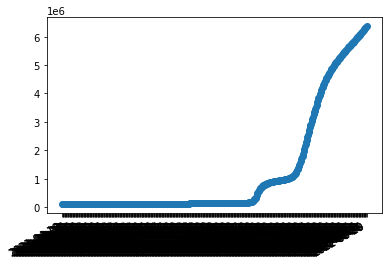

In [64]:
plt.plot_date(cum_cases['Date_reported'].iloc[-500:],cum_cases['China'].iloc[-500:])
plt.gcf().autofmt_xdate() 